# 逻辑回归

## SGD 固定步长


In [2]:
import pandas as pd
import numpy as np
np.random.seed(2021)
#########数据预处理############
def make_data(dataset): #将数据处理成123维和
    m = dataset.shape[0]
    A = np.zeros([m,123])
    b = list(dataset[:,0].T)
    for i in range(m):
        for dics in dataset[i,1:]:
            if dics is not np.NaN:
                [n,value] = [int(dic) for dic in dics.split(":")] #将字符串分割，例如6:1表示下标为6的字符串的值为1
                A[i,n-1] = value
    return (A,b)
data = pd.read_table("a9a", header=None, delimiter=" ").iloc[:,:-1].values
(A,b) = make_data(data)

##########逻辑回归损失函数#########
def loss_function(A,b,x,lam):
    m = A.shape[1]
    return np.average([np.log(1 + np.exp(-b[i]*(A[i,:]@x))) for i in range(m)]) + lam*np.linalg.norm(x,ord=2)**2
def dfi(A,b,x,lam,i): #第i个分量梯度
    return 2*lam*x - np.mat(((np.exp(-b[i]*(A[i,:]@x))*b[i]*A[i,:])/(1 + np.exp(-b[i]*(A[i,:]@x))))).T

# 有固定步长的随机梯度下降法

In [3]:
def SGD_Fixed_Step(A,b,eps,step,lam):
    t = 0 #计数器
    s = step
    m = A.shape[0]
    x = np.zeros([A.shape[1], 1])# 初始值全0矩阵
    err = np.inf
    result_matrix = np.c_[t,x.T,loss_function(A,b,x,lam)]
    while (t < 1e4):
        origin_x = x
        i = np.random.randint(0,m-1)
        x = x - s*dfi(A,b,x,lam,i)
        fx = loss_function(A,b,x,lam)
        f_star = min(result_matrix[:,-1])
        err = abs(f_star-fx)
        t += 1
        result_matrix = np.r_[result_matrix,np.c_[t,x.T,fx]] #结果存入矩阵方便画图
        print (fx) #调试用代码
    f_star = min(result_matrix[:,-1])
    print("*"*100 + "\nlambda为：{lam}\n迭代次数为：{t}\n目标函数最优值为：{fx} \n最优解为：\n{x}\n".format(lam = lam,t = t, fx = f_star,x = list(x.T)))
    return result_matrix
colnames = ["iteration​"] + ["x_{}".format(i) for i in range(1,A.shape[1]+1)] + ["target_function"] #创建result_matrix的列名列表，形如：["iteration​","x_1","x_2",...,"x_100","target_function"]
result4 = SGD_Fixed_Step(A,b,eps = 1e-6,step = 1e-2,lam = 1e-2/A.shape[0]) #lam = 1e-2/N
pd.DataFrame(columns=colnames,data=result4).to_csv('result4.csv')

0.6855252252230492
0.679588604884627
0.6711736041317623
0.6629882788558242
0.671001219805945
0.6644636133511855
0.6724539824217195
0.6659228068422761
0.6586777070531828
0.6509741110172903
0.6462814372645107
0.6396931745172978
0.6338716618288279
0.6300888526417178
0.6260032251433525
0.6208380240971272
0.6159794929061843
0.6121005502068937
0.6085477412061102
0.6037056522732752
0.6075243062553397
0.6113339888534621
0.6067217400586429
0.6019665722283666
0.5979235211341742
0.6016474735889318
0.5993133635389848
0.595157533377349
0.5915942874035229
0.5884765645585338
0.5856808251099276
0.5873208258002343
0.5844557406313711
0.5894900183018348
0.5854547008794599
0.5821044832908755
0.579280947884654
0.5768454766769394
0.5742670576422347
0.5716804365917681
0.5689818422658368
0.5662327244498121
0.5636080506462947
0.5687689911856045
0.5660743753710559
0.5636238665713577
0.5611967449640821
0.5634784181905012
0.566472196582777
0.5711948065061755
0.5751156053945826
0.5791972588512679
0.575657042418917

In [ ]:
def SGD_Diminishing_Step(A,b,eps,step,lam):
    t = 0 #计数器
    s = step
    m = A.shape[0]
    x = np.zeros([A.shape[1], 1])# 初始值全0矩阵
    err = np.inf
    result_matrix = np.c_[t,x.T,loss_function(A,b,x,lam)]
    while (t < 1e4):
        origin_x = x
        i = np.random.randint(0,m-1)
        s = s*0.995
        x = x - s*dfi(A,b,x,lam,i)
        fx = loss_function(A,b,x,lam)
        f_star = min(result_matrix[:,-1])
        err = np.linalg.norm(origin_x - x,ord=1)
        t += 1
        result_matrix = np.r_[result_matrix,np.c_[t,x.T,fx]] #结果存入矩阵方便画图
        print (fx) #调试用代码
    f_star = min(result_matrix[:,-1])
    print("*"*100 + "\nlambda为：{lam}\n迭代次数为：{t}\n目标函数最优值为：{fx} \n最优解为：\n{x}\n".format(lam = lam,t = t, fx = f_star,x = list(x.T)))
    return result_matrix
colnames = ["iteration​"] + ["x_{}".format(i) for i in range(1,A.shape[1]+1)] + ["target_function"] #创建result_matrix的列名列表，形如：["iteration​","x_1","x_2",...,"x_100","target_function"]
result5 = SGD_Diminishing_Step(A,b,eps = 1e-6,step = 1e-2,lam = 1e-2/A.shape[0]) #lam = 1e-2/N
pd.DataFrame(columns=colnames,data=result5).to_csv('result5.csv')

0.6843513654760625
0.6761752054700794
0.6820636763531623
0.6881778290863323
0.6812196650973481
0.6870551860403217
0.6797969766472313
0.6711434535871492
0.6651618290799718
0.6718405516749745
0.6799362256069624
0.6726195080785861
0.665264990986482
0.6582692241643017
0.651856466796685
0.6456905049234994
0.6411918014416652
0.6357025837466633
0.6317548671853334
0.636224019791661
0.6311393696266665
0.6258176120547712
0.6208018707049507
0.616872821444099
0.6137665872461513
0.6088805814397611
0.6057971220710899
0.6019655586705243
0.6056603305713794
0.6020110690727155
0.5975807072261777
0.5947169537413783
0.5914199739157892
0.5939343405021051
0.5909943600100659
0.5882468513031576
0.5914864717880146
0.5879227953232325
0.5854544842209126
0.5825585052220662
0.5794255551364043
0.5766307466978999
0.5807036977112398
0.5780322612471192
0.5754578980827141
0.5779928475301871
0.5754169590150543
0.5734895885781807
0.577442483565931
0.575457346277559
0.5739233874145223
0.5711665101280783
0.5685680923785795

# SVRG

In [ ]:
def SVRG(A,b,eps,learning_rate,lam,T):
    s = 0 #计数器
    step = learning_rate
    m = A.shape[0]
    x_tilde = np.zeros([A.shape[1], 1])# 初始值全0矩阵
    err = np.inf
    result_matrix = np.c_[s,x_tilde.T,loss_function(A,b,x_tilde,lam)]
    while (s < 1e4): #防止因为t选择0导致err = 0，直接弹出循环 
        origin_x = x_tilde
        z_tilde = np.average([dfi(A,b,x_tilde,lam,i) for i in range(m)])
        x = {0:x_tilde}
        for t in range(1,T+1): #进行T步迭代后计算一次全梯度     
            i = np.random.randint(0,m-1)
            x[t] = x[t-1] - step*(dfi(A,b,x[t-1],lam,i) - dfi(A,b,x_tilde,lam,i) + z_tilde)
        t = np.random.randint(0,T-1)
        x_tilde = x[t]
        fx = loss_function(A,b,x_tilde,lam)
        f_star = min(result_matrix[:,-1])
        err = abs(f_star-fx)
        s += 1
        result_matrix = np.r_[result_matrix,np.c_[s,x_tilde.T,fx]] #结果存入矩阵方便画图
        print (fx) #调试用代码
    f_star = min(result_matrix[:,-1])
    print("*"*100 + "\nlambda为：{lam}\n迭代次数为：{t}\n目标函数最优值为：{fx} \n最优解为：\n{x}\n".format(lam = lam,t = t, fx = f_star,x = list(x_tilde.T)))
    return result_matrix
colnames = ["iteration​"] + ["x_{}".format(i) for i in range(1,A.shape[1]+1)] + ["target_function"] #创建result_matrix的列名列表，形如：["iteration​","x_1","x_2",...,"x_100","target_function"]
result6 = SVRG(A,b,eps = 1e-6,learning_rate = 1e-2,lam = 1e-2/A.shape[0], T = 10) #lam = 1e-2/N
pd.DataFrame(columns=colnames,data=result6).to_csv('result6.csv')

0.6865804279027209
0.6865804279027209
0.6837817127263989
0.6768591051592702
0.6719055671673186
0.6694704957317709
0.6678658428560152
0.667067587205517
0.6662756920135334
0.6618126027136402
0.6610626744602991
0.655476831024087
0.6534197622185073
0.6501521476820685
0.6452358387034084
0.6428358969354186
0.6416510957123822
0.6382772246104386
0.6345553293586873
0.6319812922034839
0.6281667794528678
0.6272075594460491
0.6249203327468759
0.6240130166160637
0.6210484751664842
0.6202018030642726
0.618965956613837
0.618965956613837
0.6185546497171658
0.6155000041666386
0.6151156719731635
0.6143594188431383
0.613254323952823
0.6128874368149276
0.6101559716752903
0.6078873572414166
0.6072429382442932
0.6048608978231388
0.6036852338706886
0.6031040791362517
0.6025329061010987
0.6003919030406043
0.5993528890422927
0.5978601259422912
0.5964404759695987
0.5952948154554918
0.5950658631210832
0.5946159533258959
0.5931317457725861
0.5929191683690066
0.5927081973823229
0.5920919615933032
0.591487606659872

# 画图

C:\Python39\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
C:\Python39\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
C:\Python39\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when

FileNotFoundError: [Errno 2] No such file or directory: 'Converage of lambda 1e-2/N.png'

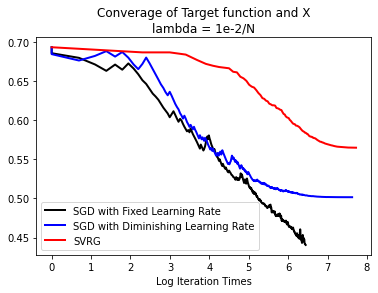

In [ ]:
import matplotlib.pyplot as plt
def make_plot(result_matrix,label,color):
    x = [0.]+list(np.log(result_matrix[1:,0])) # 对x轴进行log采样
    plt.plot(x,result_matrix[:,-1],label = label,linewidth = 2, color = color)
plt.xlabel("Log Iteration Times")
plt.title("Converage of Target function and X\nlambda = {}".format("1e-2/N"))
make_plot(result4,"SGD with Fixed Learning Rate","black")
make_plot(result5,"SGD with Diminishing Learning Rate","blue")
make_plot(result6,"SVRG","red")
plt.legend()
plt.savefig("Converage of Logistic Regression.png",dpi=500)
plt.show()
